In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
db = pd.read_csv(r"D:\Docs\TRY HARD TIME\Data_project\adidas_vs_nike\Adidas Vs Nike.csv")

In [3]:
db.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [4]:
db.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Description', 'Rating', 'Reviews', 'Last Visited'],
      dtype='object')

In [24]:
db.describe()

,ListingPrice,SalePrice,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [110]:
db.isnull().sum()

ProductName     0
ProductID       0
ListingPrice    0
SalePrice       0
Discount        0
Brand           0
Description     3
Rating          0
Reviews         0
LastVisited     0
dtype: int64

In [5]:
db.rename(columns={'Product Name':'ProductName', 'Product ID':'ProductID', 'Listing Price':'ListingPrice'
                   ,'Sale Price':'SalePrice', 'Last Visited':'LastVisited'}, inplace=True)

In [43]:
GroupedByBrands=db.groupby('Brand')
Nike= GroupedByBrands.get_group('Nike')
Originals=GroupedByBrands.get_group('Adidas ORIGINALS')
Neo=GroupedByBrands.get_group('Adidas CORE / NEO')
Sports=GroupedByBrands.get_group('Adidas SPORT PERFORMANCE')

## Brand Analysis

In [6]:
db.Brand.unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [7]:
db.Brand.isin(["Adidas Adidas ORIGINALS"])

0        True
1       False
2       False
3       False
4       False
        ...  
3263    False
3264    False
3265    False
3266    False
3267    False
Name: Brand, Length: 3268, dtype: bool

In [8]:
#fix the first row where the brand is mistyped
db = db.replace(['Adidas Adidas ORIGINALS'],'Adidas ORIGINALS')
#recheck
db.Brand.isin(["Adidas Adidas ORIGINALS"])

0       False
1       False
2       False
3       False
4       False
        ...  
3263    False
3264    False
3265    False
3266    False
3267    False
Name: Brand, Length: 3268, dtype: bool

<Axes: xlabel='class', ylabel='Count'>

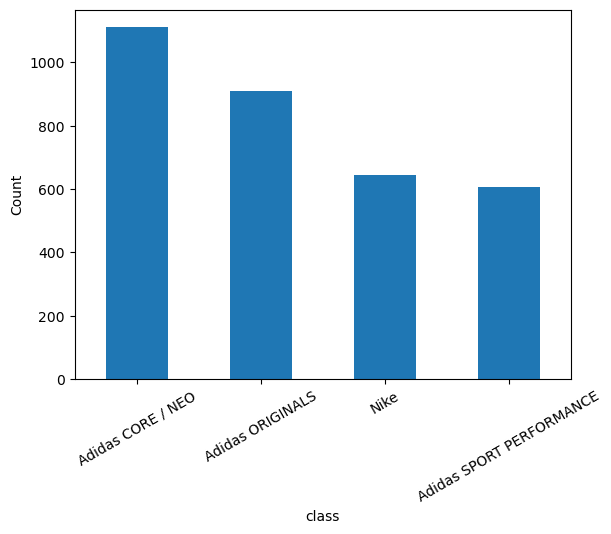

In [13]:
db['Brand'].value_counts().plot(kind='bar', xlabel='class', ylabel='Count', rot= 30)

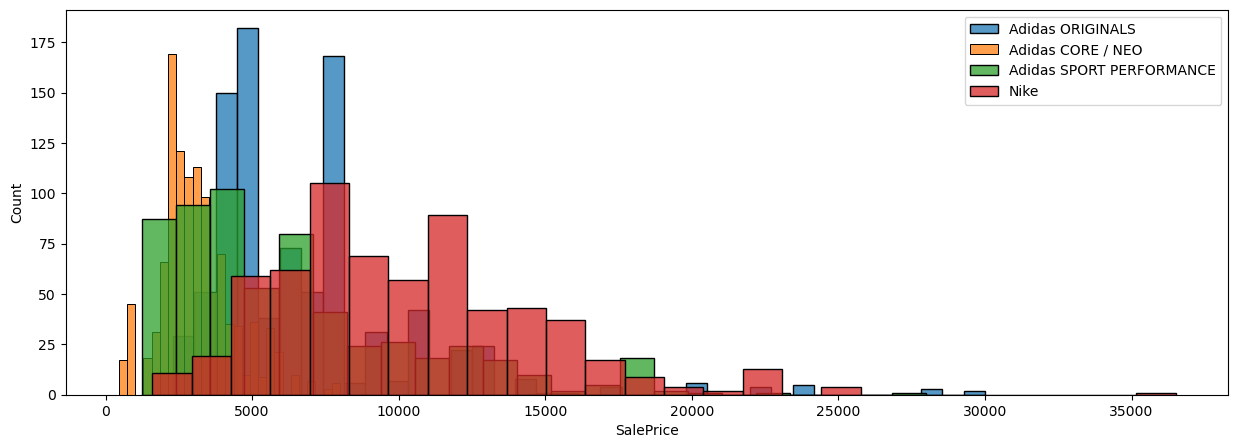

In [114]:
plt.figure(figsize=(15,5))

sns.histplot(Originals.SalePrice,kde=False,label ="Adidas ORIGINALS",multiple="stack")
sns.histplot(Neo.SalePrice,kde=False,label ="Adidas CORE / NEO",multiple="stack")
sns.histplot(Sports.SalePrice,kde=False,label ="Adidas SPORT PERFORMANCE",multiple="stack")
sns.histplot(Nike.SalePrice,kde=False,label ="Nike",multiple="stack")

plt.legend()
plt.show()

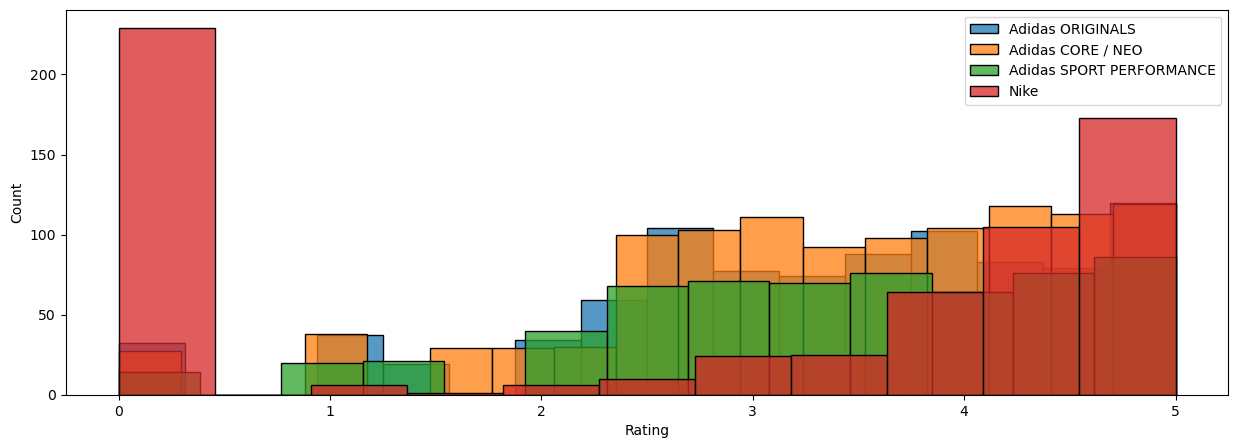

In [115]:
plt.figure(figsize=(15,5))


sns.histplot(Originals.Rating,kde=False,multiple="stack",label ="Adidas ORIGINALS")
sns.histplot(Neo.Rating,kde=False,multiple="stack",label="Adidas CORE / NEO")
sns.histplot(Sports.Rating,kde=False,multiple="stack",label="Adidas SPORT PERFORMANCE")
sns.histplot(Nike.Rating,kde=False,label="Nike")

plt.legend()
plt.show()

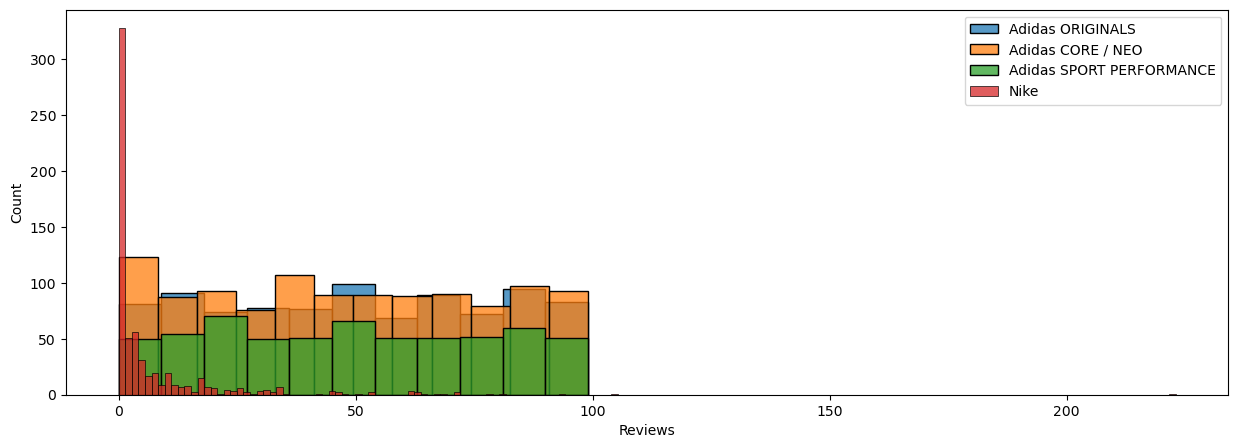

In [116]:
plt.figure(figsize=(15,5))


sns.histplot(Originals.Reviews,kde=False,label ="Adidas ORIGINALS")
sns.histplot(Neo.Reviews,kde=False,label="Adidas CORE / NEO")
sns.histplot(Sports.Reviews,kde=False,label="Adidas SPORT PERFORMANCE")
sns.histplot(Nike.Reviews,kde=False,label="Nike")

plt.legend()
plt.show()

In [23]:
db[db['Rating'] == 0.0 ]

,ProductName,ProductID,ListingPrice,SalePrice,Discount,Brand,Description,Rating,Reviews,LastVisited
61,Men's adidas Running Nepton 2.0 Shoes,CK9664,5999,2999,50,Adidas CORE / NEO,Sleek design with reflective three stripes mak...,0.0,17,2020-04-13T15:06:20
86,MEN'S ADIDAS ORIGINALS MICROPACER X R1 SHOES,EE3625,15999,7999,50,Adidas ORIGINALS,These shoes are a hybrid of retro and modern a...,0.0,94,2020-04-13T15:06:21
87,Men's adidas Outdoor Andorian Shoes,CM0031,4599,2299,50,Adidas SPORT PERFORMANCE,The adidas Andorian shoes for men are crafted ...,0.0,49,2020-04-13T15:06:21
90,MEN'S ADIDAS ESSENTIALS EEZAY FLIP-FLOPS,F35028,1999,999,50,Adidas CORE / NEO,These men's classic flip-flops offer a clean b...,0.0,67,2020-04-13T15:06:21
174,WOMEN'S ADIDAS ORIGINALS SAMBA OG SHOES,B44697,7999,3999,50,Adidas ORIGINALS,The Samba is a timeless icon of street style. ...,0.0,85,2020-04-13T15:06:25
...,...,...,...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,AT7968-606,0,4995,0,Nike,The Nike Mercurial Vapor 13 Club MG wraps your...,0.0,0,2020-04-13T15:39:01
3259,Nike Mercurial Vapor 13 Academy IC,AT7993-414,7495,5247,0,Nike,The soft upper of the Nike Mercurial Vapor 13 ...,0.0,0,2020-04-13T15:39:11
3260,Nike Tiempo Legend 8 Academy TF,AT6100-606,0,6495,0,Nike,The Nike Tiempo Legend 8 Academy TF takes the ...,0.0,0,2020-04-13T15:40:51
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03


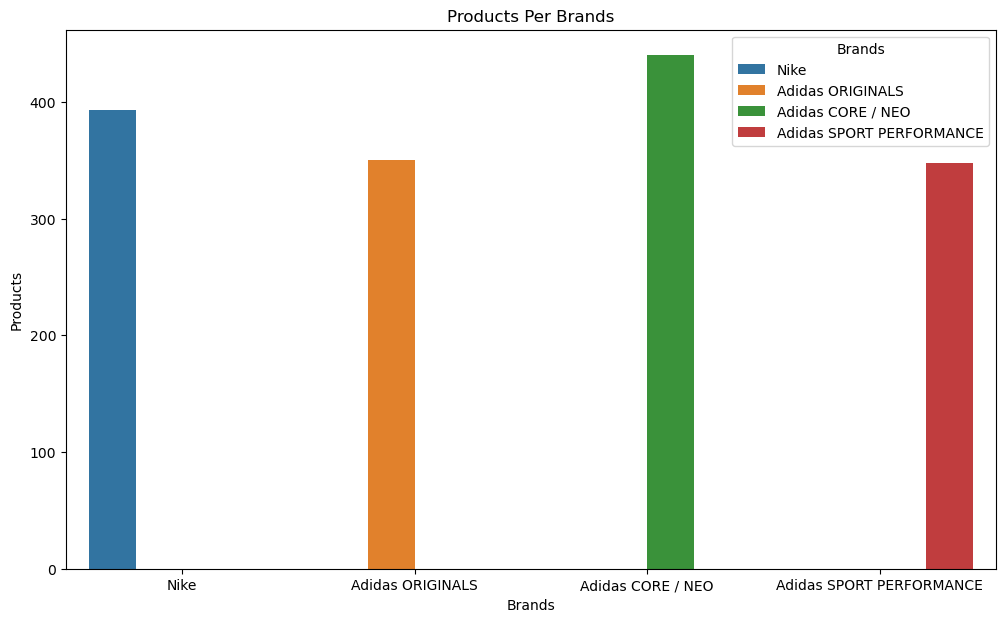

In [59]:
#number of product per brand
plt.figure(figsize=(12,7))
n=Nike['ProductName'].value_counts().count()
o=Originals['ProductName'].value_counts().count()
n1=Neo['ProductName'].value_counts().count()
s=Sports['ProductName'].value_counts().count()

Products=[n,o,n1,s]
Brands=['Nike','Adidas ORIGINALS', 'Adidas CORE / NEO','Adidas SPORT PERFORMANCE'];

Pro_per_Brand = pd.DataFrame({'Products': Products, 'Brands': Brands})

sns.barplot(Pro_per_Brand, x="Brands", y="Products", hue="Brands")
plt.title('Products Per Brands');
plt.show()

## Prices Analysis

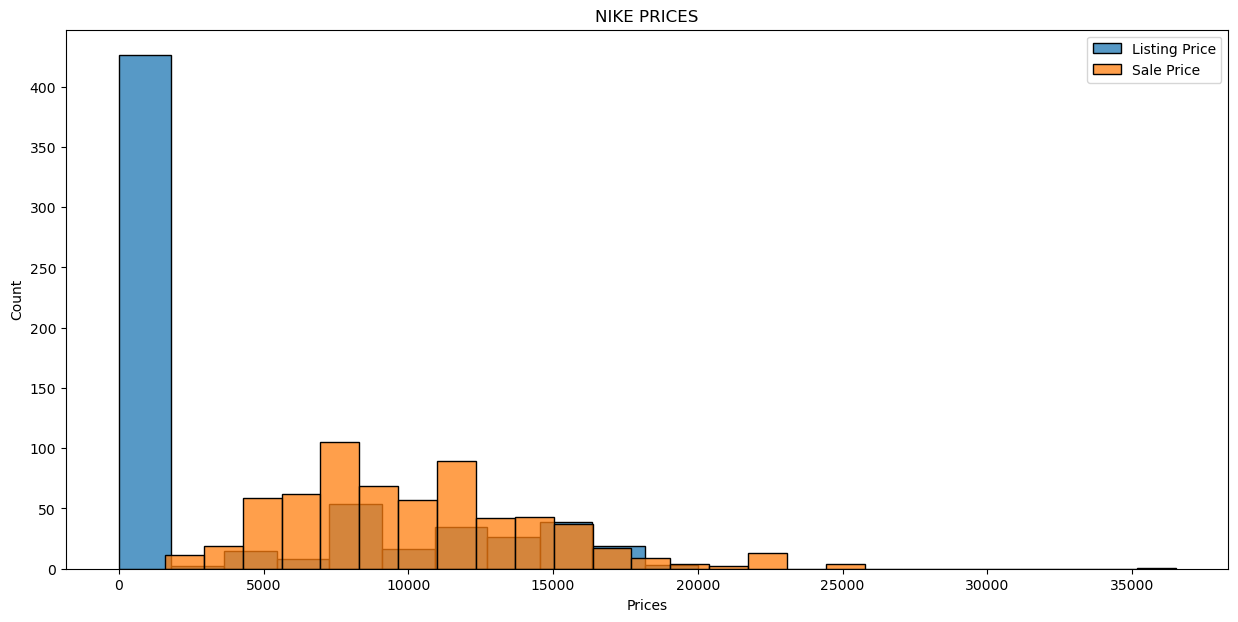

In [102]:
plt.figure(figsize=(15,7))

#sns.displot(Nike["ListingPrice"],kde=False)
#sns.displot(Nike.SalePrice,kde=False)

sns.histplot(Nike["ListingPrice"],kde=False, label = 'Listing Price')
sns.histplot(Nike.SalePrice,kde=False, label = 'Sale Price')

plt.xlabel("Prices")
plt.title('NIKE PRICES')
plt.legend()
plt.show()

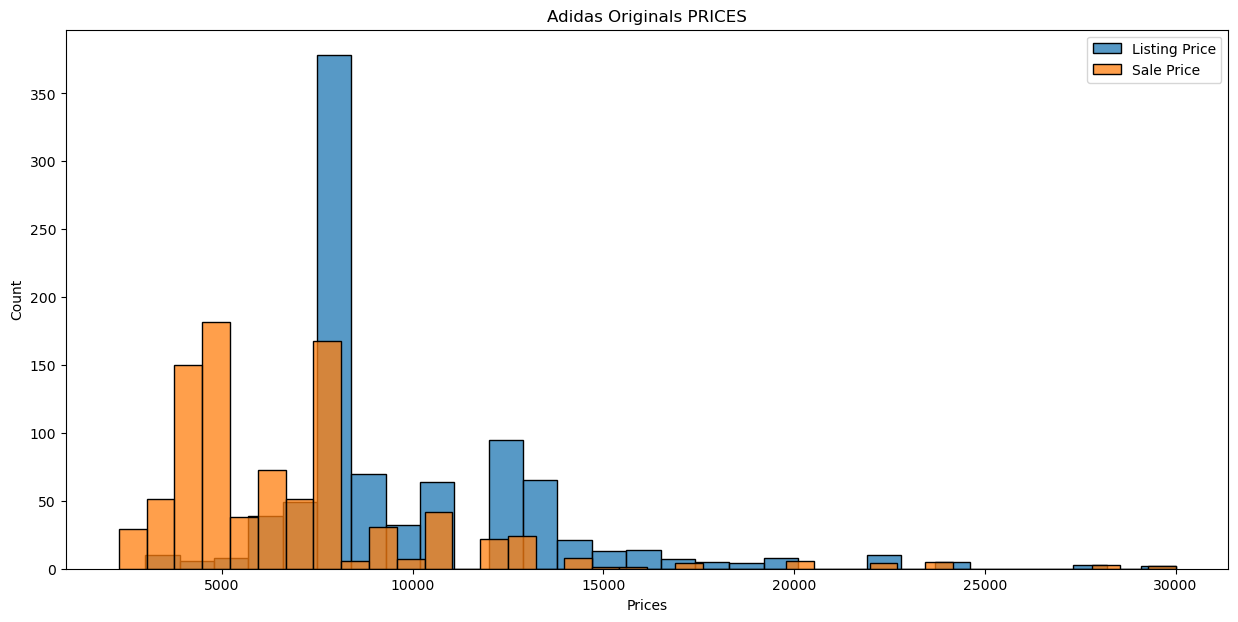

In [103]:
plt.figure(figsize=(15,7))

sns.histplot(Originals.ListingPrice,kde=False, label = 'Listing Price')
sns.histplot(Originals.SalePrice,kde=False, label = 'Sale Price')

plt.xlabel("Prices")
plt.title('Adidas Originals PRICES')
plt.legend()
plt.show()

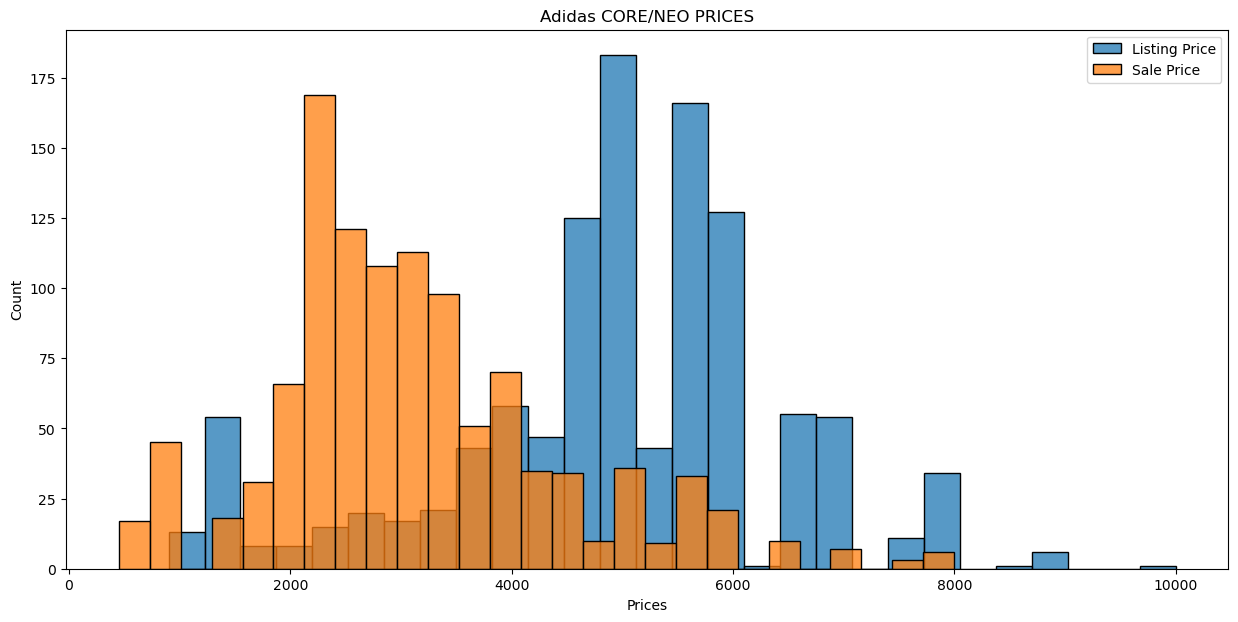

In [105]:
plt.figure(figsize=(15,7))

sns.histplot(Neo.ListingPrice,kde=False, label = 'Listing Price')
sns.histplot(Neo.SalePrice,kde=False, label = 'Sale Price')

plt.xlabel("Prices")
plt.title('Adidas CORE/NEO PRICES')
plt.legend()
plt.show()

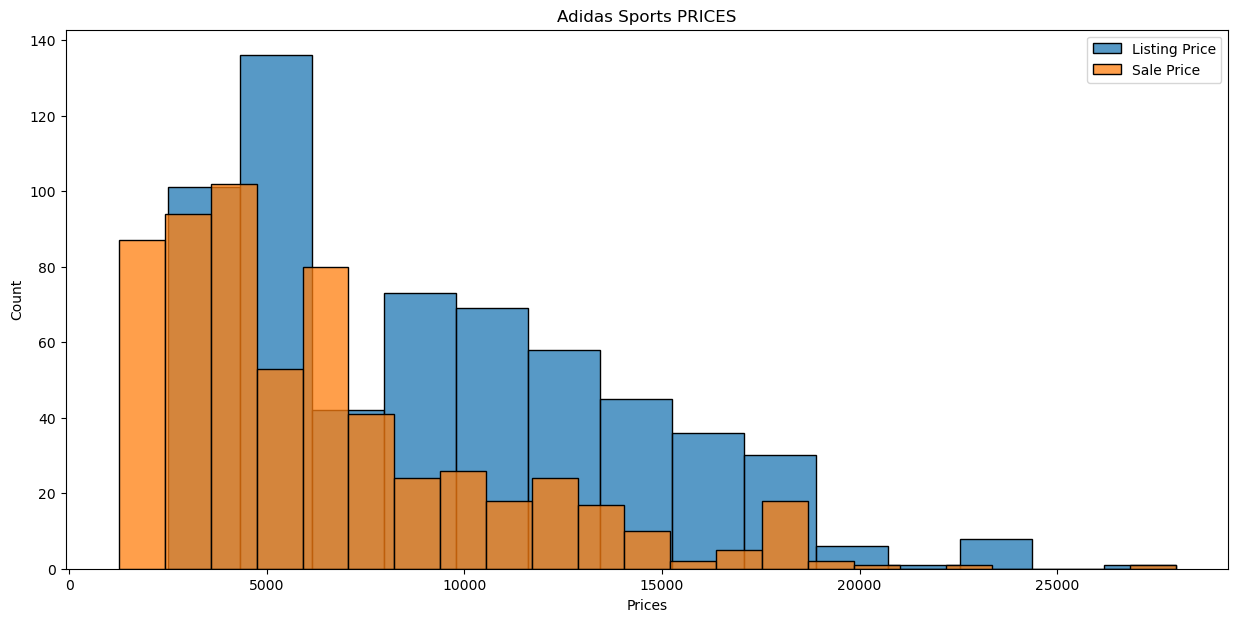

In [104]:
plt.figure(figsize=(15,7))

sns.histplot(Sports.ListingPrice,kde=False, label = 'Listing Price')
sns.histplot(Sports.SalePrice,kde=False, label = 'Sale Price')

plt.xlabel("Prices")
plt.title('Adidas Sports PRICES')
plt.legend()
plt.show()

## Products

In [120]:
#TOP 50 MOST EXPENSIVE PRODUCTS

db_50 = db.sort_values(by ='SalePrice',ascending=False).head(50)
db_50

,ProductName,ProductID,ListingPrice,SalePrice,Discount,Brand,Description,Rating,Reviews,LastVisited
3148,Nike Air VaporMax Flyknit 2 LXX,AT5673-700,0,36500,0,Nike,The Nike Air VaporMax Flyknit 2 LXX places you...,0.0,0,2020-04-13T15:36:42
2554,Men's adidas Originals ZX 4000 4D Shoes,BD7927,29999,29999,0,Adidas ORIGINALS,"In the '80s, the science of sport and wearable...",2.4,37,2020-04-13T15:07:57
2579,Men's adidas Originals ZX 4000 4D Shoes,BD7865,29999,29999,0,Adidas ORIGINALS,"In the '80s, the science of sport and wearable...",4.0,53,2020-04-13T15:07:57
1438,Men's adidas Originals ZX 4000 4D Shoes,EF9625,27999,27999,0,Adidas ORIGINALS,Thousands of athletes. Years of data. adidas 4...,2.8,32,2020-04-13T15:07:11
1642,Unisex adidas Running Alphaedge 4D Shoes,FV6106,27999,27999,0,Adidas SPORT PERFORMANCE,Add an edge to your game with the new AlphaEdg...,2.2,53,2020-04-13T15:07:21
1553,Men's adidas Originals ZX 4000 4D Shoes,EF9624,27999,27999,0,Adidas ORIGINALS,The ZX trainers series resets the running scen...,3.5,18,2020-04-13T15:07:16
1563,Men's adidas Originals ZX 4000 4D Shoes,EF9623,27999,27999,0,Adidas ORIGINALS,The ZX trainers series resets the running scen...,3.1,62,2020-04-13T15:07:16
2931,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,2020-04-13T15:32:30
2693,Nike Mercurial Superfly 7 Elite SE FG,CT1099-093,0,24995,0,Nike,Everyone starts somewhere and Kylian Mbappé st...,0.0,0,2020-04-13T15:28:15
3164,Nike Mercurial Superfly 7 Elite MDS FG,BQ5469-703,0,24995,0,Nike,Dream of speed and play fast in the Nike Mercu...,5.0,1,2020-04-13T15:36:47


<Axes: xlabel='class', ylabel='Count'>

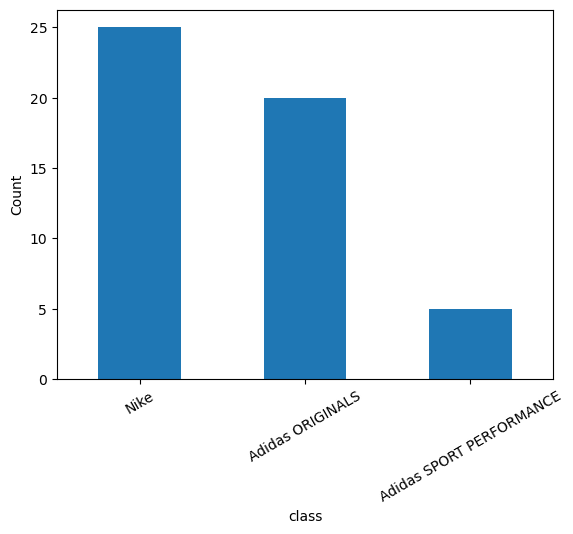

In [124]:
#Analyzing the brands in the top 50 items

db_50['Brand'].value_counts().plot(kind='bar', xlabel='class', ylabel='Count', rot= 30)

There is no Adidas CORE/NEO products in the top 50.

From the db, we see some of the most expensive products has no listing price, so most items either bought directly, or through backdoor.